# imports

In [35]:
import pandas as pd
import pandas_profiling
import numpy as np; np.random.seed(0)
import matplotlib.pyplot as plt; plt.rcParams['font.family'] = 'Malgun Gothic'
import seaborn as sns; sns.set(font='Malgun Gothic')
import warnings; warnings.filterwarnings(action='ignore')

from IPython.core.display import display, HTML
# display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

In [2]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
# preprocessing.scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# decomposition.PCA
from sklearn.decomposition import PCA
# stats : R module
from scipy.stats import skew, kurtosis

# estimators ---------------------------------------
# estimators.regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
# --------------------------------------------------

# neural network -----------------------------------
import tensorflow as tf; tf.random.set_seed(0)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# --------------------------------------------------

# ensemble -----------------------------------------
# ensemble.bagging
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
# ensemble.boosting
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
# ensemble.boosting & bagging
from xgboost import XGBRFClassifier, XGBRFRegressor
# ensemble.voting
from sklearn.ensemble import VotingClassifier, VotingRegressor
# --------------------------------------------------

# metrics ------------------------------------------
# metrics.scores
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import log_loss
# metrics.reports
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
# metrics.errors
from sklearn.metrics import mean_squared_error     # 'neg_mean_squared_error', 'neg_root_mean_squared_error'
from sklearn.metrics import mean_squared_log_error # 'neg_mean_squared_log_error'
from sklearn.metrics import mean_absolute_error    # 'neg_mean_absolute_error'
from sklearn.metrics import roc_curve, plot_roc_curve
# --------------------------------------------------

# model_selection ----------------------------------
# model_selection.splitter
from sklearn.model_selection import train_test_split
# model_selection.model_validation
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate
# model_selection.hyper_parameter_optimizer
from sklearn.model_selection import GridSearchCV
# --------------------------------------------------

# optuna -------------------------------------------
import optuna
# --------------------------------------------------

# read

In [3]:
train = pd.read_csv('./train.csv')
test  = pd.read_csv('./test.csv')
sub   = pd.read_csv('./sample_submission.csv')

In [4]:
train.shape, test.shape, sub.shape

((1205, 12), (50, 10), (50, 3))

In [5]:
train.drop(['일자', '조식메뉴', '중식메뉴', '석식메뉴'], axis=1, inplace=True)
test.drop(['일자', '조식메뉴', '중식메뉴', '석식메뉴'], axis=1, inplace=True)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   요일              1205 non-null   object 
 1   본사정원수           1205 non-null   int64  
 2   본사휴가자수          1205 non-null   int64  
 3   본사출장자수          1205 non-null   int64  
 4   본사시간외근무명령서승인건수  1205 non-null   int64  
 5   현본사소속재택근무자수     1205 non-null   float64
 6   중식계             1205 non-null   float64
 7   석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(1)
memory usage: 75.4+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   요일              50 non-null     object 
 1   본사정원수           50 non-null     int64  
 2   본사휴가자수          50 non-null     int64  
 3   본사출장자수          50 non-null     int64  
 4   본사시간외근무명령서승인건수  50 non-null     int64  
 5   현본사소속재택근무자수     50 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.5+ KB


In [8]:
train.head()

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계
0,월,2601,50,150,238,0.0,1039.0,331.0
1,화,2601,50,173,319,0.0,867.0,560.0
2,수,2601,56,180,111,0.0,1017.0,573.0
3,목,2601,104,220,355,0.0,978.0,525.0
4,금,2601,278,181,34,0.0,925.0,330.0


In [9]:
test.head()

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수
0,수,2983,88,182,5,358.0
1,목,2983,104,212,409,348.0
2,금,2983,270,249,0,294.0
3,월,2924,108,154,538,322.0
4,화,2924,62,186,455,314.0


In [10]:
sub.head()

,일자,중식계,석식계
0,2021-01-27,0,0
1,2021-01-28,0,0
2,2021-01-29,0,0
3,2021-02-01,0,0
4,2021-02-02,0,0


# eda

In [ ]:
fro

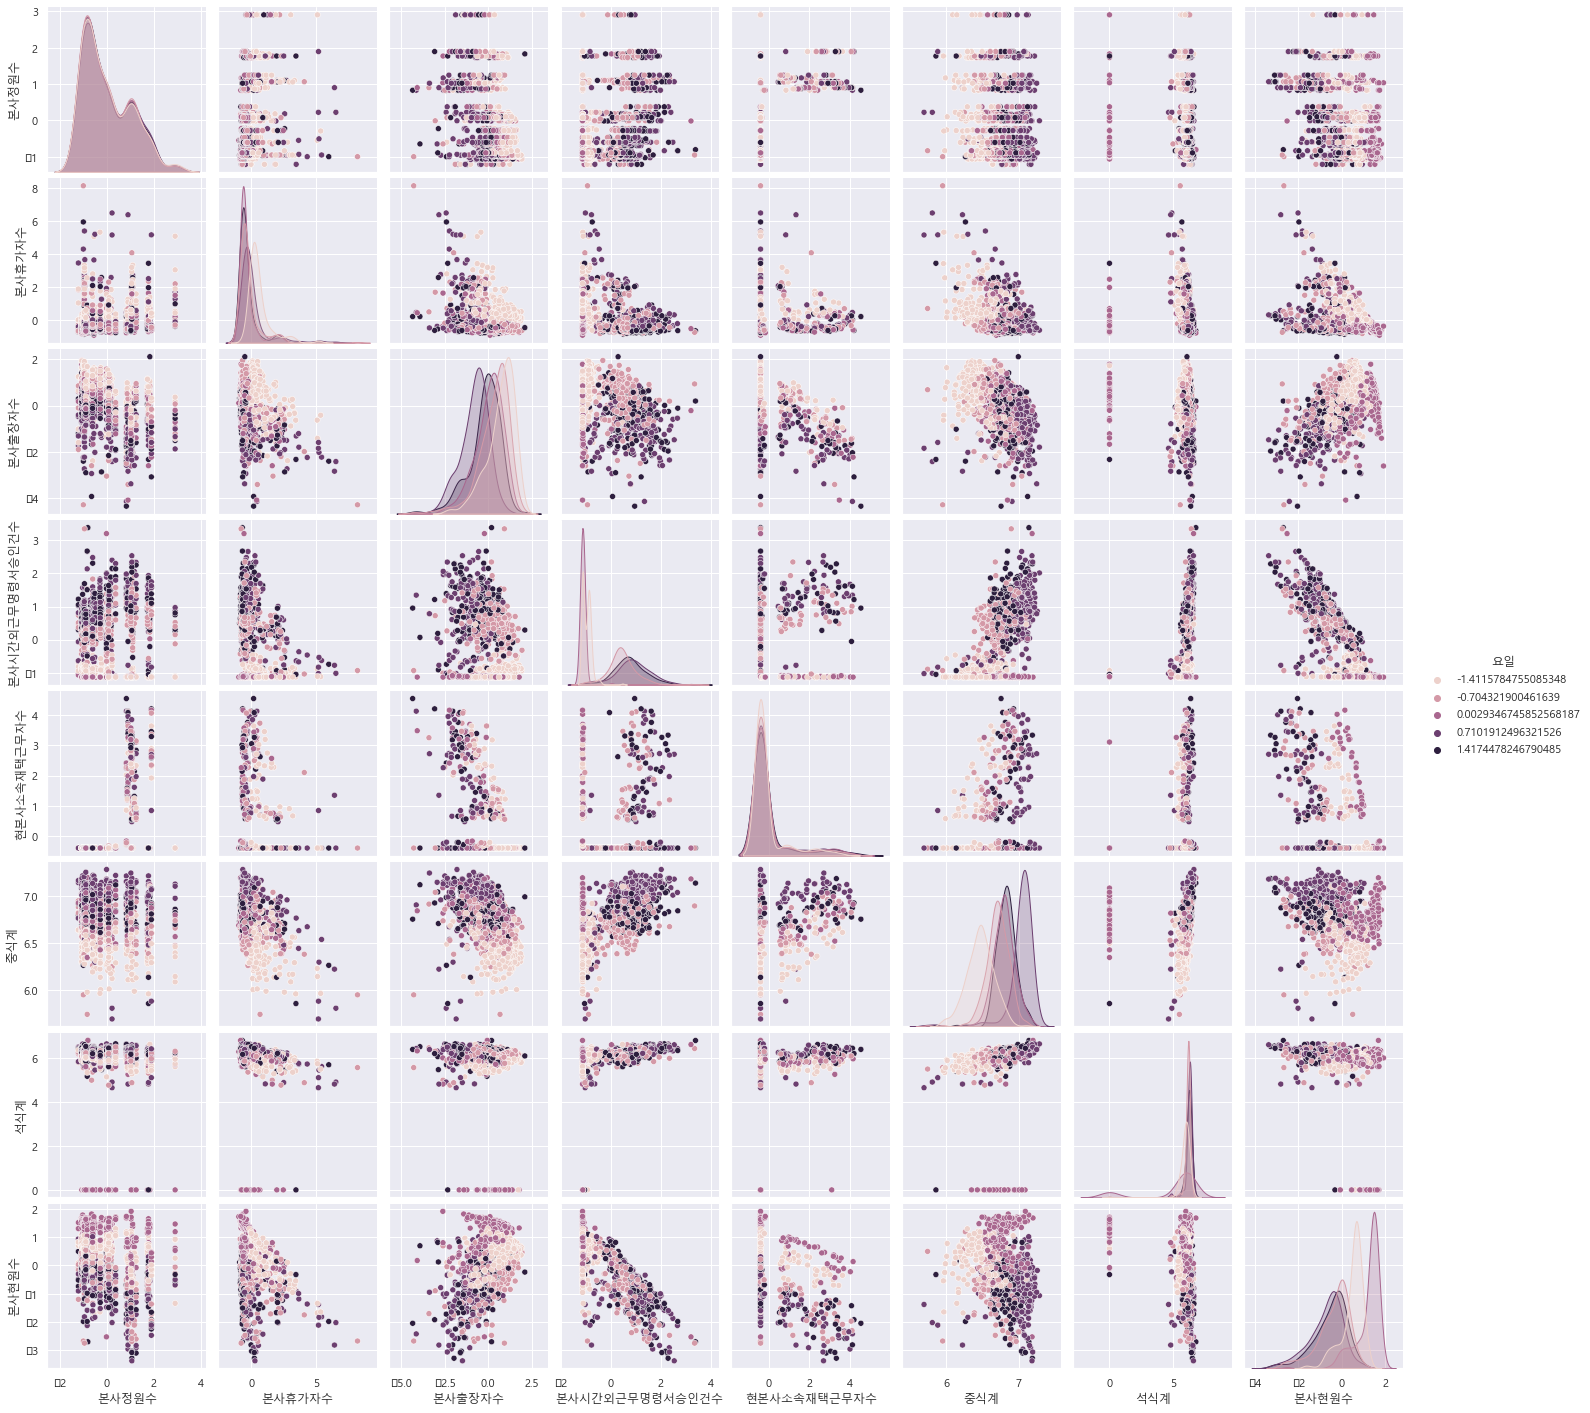

In [36]:
sns.pairplot(data=train, hue='요일')

# derived features

In [12]:
train['본사현원수'] = train['본사정원수'] - train[['본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수', ]].sum(axis=1)
test['본사현원수']  = test['본사정원수']  - test[['본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수', ]].sum(axis=1)

In [13]:
for col in ['본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수', '본사현원수']:
    train[col] = train[col] / train['본사정원수']
    test[col]  = test[col] / train['본사정원수']

# encode

In [14]:
le = LabelEncoder()

le.fit(train['요일'])
train['요일'] = le.transform(train['요일'])
test['요일']  = le.transform(test['요일'])

# scale

In [15]:
ss = StandardScaler()

scale_cols = ['요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수', '본사현원수']

# train[scale_cols] = np.log1p(train[scale_cols])
# test[scale_cols]  = np.log1p(test[scale_cols])

ss.fit(train[scale_cols])
train[scale_cols] = ss.transform(train[scale_cols])
test[scale_cols]  = ss.transform(test[scale_cols])


# log scale

array([[<AxesSubplot:title={'center':'중식계'}>,
        <AxesSubplot:title={'center':'석식계'}>]], dtype=object)

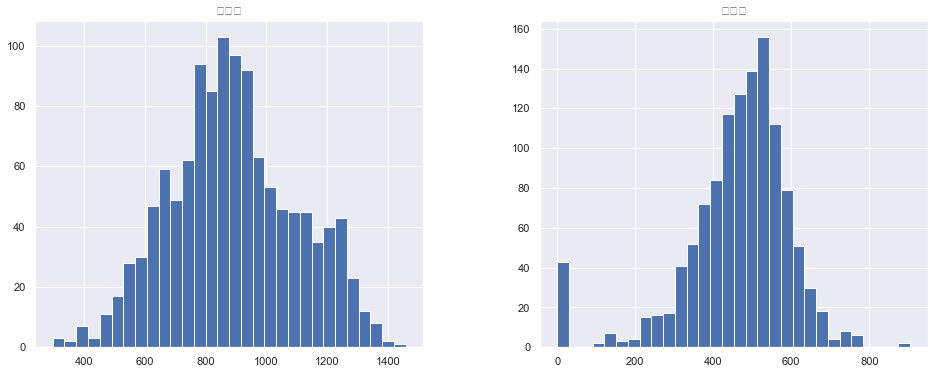

In [16]:
train[['중식계', '석식계']].hist(bins=30, figsize=(16, 6))

In [17]:
train['중식계'] = np.log1p(train['중식계'])
train['석식계'] = np.log1p(train['석식계'])

In [18]:
X  = train.drop(['중식계', '석식계'], axis=1)
y1 = train['중식계']
y2 = train['석식계']

# score

## 중식계

In [19]:
# regression metrics : INPUT TRAIN & TARGET

# split ------------------------------------------------------
X = X
y = y1
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, shuffle=True,
)

# model loop -------------------------------------------------
regression_result_list   = []
regression_models = [
    RandomForestRegressor    (),
    XGBRegressor             (verbosity=0),
    XGBRFRegressor           (verbosity=0),
    LGBMRegressor            (),
    CatBoostRegressor        (verbose=0),
]
regression_models_fitted1 = []

for regression_model in regression_models:
    
    regression_model.fit(X_train, y_train)
    
    # fitted models appended
    regression_models_fitted1.append(regression_model)
    
    y_pred = regression_model.predict(X_val)
    
    # errors -----------------------------------------------------
    mse  = mean_squared_error    (y_val, y_pred)
    rmse = mean_squared_error    (y_val, y_pred, squared=False)
    msle = mean_squared_log_error(y_val, y_pred)
    mae  = mean_absolute_error   (y_val, y_pred)
    
    regression_model_score = [regression_model.__class__.__name__, mse, rmse, msle, mae]
    regression_result_list.append(regression_model_score)
    
    print('fitted :', regression_model.__class__.__name__)

print('-' * 50)
print('regression_models_fitted1 : list ready')
print('-' * 50)

# result df
regression_df1 = pd.DataFrame(regression_result_list, columns=['estimator', 'MSE', 'RMSE', 'MSLE', 'MAE'])
regression_df1

fitted : RandomForestRegressor
fitted : XGBRegressor
fitted : XGBRFRegressor
fitted : LGBMRegressor
fitted : CatBoostRegressor
--------------------------------------------------
regression_models_fitted1 : list ready
--------------------------------------------------


,estimator,MSE,RMSE,MSLE,MAE
0,RandomForestRegressor,0.012831,0.113275,0.000219,0.086055
1,XGBRegressor,0.013865,0.117749,0.000235,0.088268
2,XGBRFRegressor,0.012897,0.113566,0.000219,0.089003
3,LGBMRegressor,0.011918,0.109168,0.000204,0.082209
4,CatBoostRegressor,0.011300,0.106300,0.000193,0.079495


## 석식계

In [23]:
# regression metrics : INPUT TRAIN & TARGET

# split ------------------------------------------------------
X = X
y = y2
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, shuffle=True,
)

# model loop -------------------------------------------------
regression_result_list   = []
regression_models = [
    RandomForestRegressor    (),
    XGBRegressor             (verbosity=0),
    XGBRFRegressor           (verbosity=0),
    LGBMRegressor            (),
    CatBoostRegressor        (verbose=0),
]
regression_models_fitted2 = []

for regression_model in regression_models:
    
    regression_model.fit(X_train, y_train)
    
    # fitted models appended
    regression_models_fitted2.append(regression_model)
    
    y_pred = regression_model.predict(X_val)
    
    # errors -----------------------------------------------------
    mse  = mean_squared_error    (y_val, y_pred)
    rmse = mean_squared_error    (y_val, y_pred, squared=False)
    msle = mean_squared_log_error(y_val, y_pred)
    mae  = mean_absolute_error   (y_val, y_pred)
    
    regression_model_score = [regression_model.__class__.__name__, mse, rmse, msle, mae]
    regression_result_list.append(regression_model_score)
    
    print('fitted :', regression_model.__class__.__name__)

print('-' * 50)
print('regression_models_fitted2 : list ready')
print('-' * 50)

# result df
regression_df2 = pd.DataFrame(regression_result_list, columns=['estimator', 'MSE', 'RMSE', 'MSLE', 'MAE'])
regression_df2

fitted : RandomForestRegressor
fitted : XGBRegressor
fitted : XGBRFRegressor
fitted : LGBMRegressor
fitted : CatBoostRegressor
--------------------------------------------------
regression_models_fitted2 : list ready
--------------------------------------------------


,estimator,MSE,RMSE,MSLE,MAE
0,RandomForestRegressor,0.880600,0.938403,0.091078,0.310781
1,XGBRegressor,0.988307,0.994136,0.095201,0.340355
2,XGBRFRegressor,0.840112,0.916576,0.087042,0.352212
3,LGBMRegressor,1.044222,1.021872,0.096621,0.387085
4,CatBoostRegressor,0.988812,0.994390,0.095636,0.343209


# submission

In [25]:
y1_sub = regression_models_fitted1[4].predict(test)
y1_sub = np.exp(y1_sub)
y1_sub

array([ 922.78877999,  846.84999366,  606.04997058, 1199.9254834 ,
        961.45923146,  832.74436954,  837.54369066,  648.99318281,
       1234.33212734,  960.27409602,  771.31061504, 1245.7521036 ,
        967.32471598,  973.93202909,  818.66593103,  599.39607152,
       1145.34877072,  968.93091762,  722.82832233,  750.45480978,
        510.21761834, 1060.93194588,  798.59560317,  807.20126801,
        626.61861099, 1287.28523308, 1110.94256505,  880.10088189,
        834.36399314,  597.84224509, 1231.98639284,  954.97287169,
       1010.62764549,  795.59355667,  621.36277547, 1227.25655916,
        939.86467851,  829.35471659,  711.43612738,  536.83025006,
       1231.55503095,  970.83194656,  900.54863511,  749.63406127,
        535.44871653, 1237.08212551, 1014.10589566,  847.66460345,
        807.32052989,  550.39085324])

In [26]:
y2_sub = regression_models_fitted2[0].predict(test)
y2_sub = np.exp(y2_sub)
y2_sub

array([104.99310353, 421.21729976, 157.4137862 , 516.5059754 ,
       459.6084917 , 105.64255496, 488.45335975, 116.5415698 ,
       640.52979011, 500.29464995, 109.26016623, 678.13283752,
       639.66770474,  95.51450129, 527.81768679, 332.0209751 ,
       627.90757734, 632.78598688,  94.57432118, 510.76968229,
       169.64289065, 642.47950416, 108.90377894, 523.69079354,
        87.25100552, 630.97454015, 635.74014336, 236.9798395 ,
       508.44385434,  99.95208906, 638.55775873, 533.19884939,
        60.44478535, 447.37700477, 159.26017422, 621.87115819,
       531.72790176, 161.46599594, 424.99672342, 157.16556537,
       565.37683426, 538.71184364,  99.09838478, 417.50029932,
       167.03620791, 614.53459743, 557.22895164,  64.44492213,
       458.92423817, 151.00056984])

In [27]:
sub['중식계'] = np.round(y1_sub)
sub['석식계'] = np.round(y2_sub)
sub

,일자,중식계,석식계
0,2021-01-27,923.0,105.0
1,2021-01-28,847.0,421.0
2,2021-01-29,606.0,157.0
3,2021-02-01,1200.0,517.0
4,2021-02-02,961.0,460.0
5,2021-02-03,833.0,106.0
6,2021-02-04,838.0,488.0
7,2021-02-05,649.0,117.0
8,2021-02-08,1234.0,641.0
9,2021-02-09,960.0,500.0


In [28]:
sub.to_csv('./sub/sub02.csv', index=False)

# neural network

In [ ]:
# train.shape

In [ ]:
# train[['중식계', '석식계']].hist(figsize=(16, 6), bins=30)

In [ ]:
# X  = train.drop(['중식계', '석식계'], axis=1)
# y1 = train['중식계']
# y2 = train['석식계']

In [ ]:
# X.shape

## 중식계

In [ ]:
# model1 = Sequential()
# model1.add(Dense(units=20, activation=tf.keras.activations.relu, input_dim=6))
# model1.add(Dense(units=20, activation=tf.keras.activations.relu))
# model1.add(Dense(units=20, activation=tf.keras.activations.relu))
# model1.add(Dense(units=20, activation=tf.keras.activations.relu))
# model1.add(Dense(units=1))

# model1.compile(
#     loss=tf.keras.losses.MSE, optimizer=tf.keras.optimizers.Adam(), 
# )

# filepath = './saved_model_y1/y1_{epoch}_{val_loss}.h5'

# callbacks1 = [
#     EarlyStopping(monitor='val_loss', patience=10), 
#     ModelCheckpoint(filepath=filepath, monitor='val_loss',save_weights_only=True, save_best_only=True, save_freq='epoch')
# ]

# history1 = model1.fit(
#     X, y1, 
#     epochs=100, 
#     verbose=1, 
#     callbacks=callbacks1, 
#     validation_split=0.2, 
#     shuffle=True
# )

In [ ]:
# Error: Session cannot generate requests